<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#IMDB-Movie-Review-Sentiment-Classification" data-toc-modified-id="IMDB-Movie-Review-Sentiment-Classification-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>IMDB Movie Review Sentiment Classification</a></span></li><li><span><a href="#Purpose" data-toc-modified-id="Purpose-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Purpose</a></span></li><li><span><a href="#Process" data-toc-modified-id="Process-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Process</a></span></li><li><span><a href="#Configure-notebook,-import-libraries,-and-import-dataset" data-toc-modified-id="Configure-notebook,-import-libraries,-and-import-dataset-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Configure notebook, import libraries, and import dataset</a></span><ul class="toc-item"><li><span><a href="#Import-libraries" data-toc-modified-id="Import-libraries-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Import libraries</a></span></li><li><span><a href="#Define-global-variables" data-toc-modified-id="Define-global-variables-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>Define global variables</a></span></li><li><span><a href="#Import-labeled-data" data-toc-modified-id="Import-labeled-data-4.3"><span class="toc-item-num">4.3&nbsp;&nbsp;</span>Import labeled data</a></span></li></ul></li><li><span><a href="#Examine-the-data" data-toc-modified-id="Examine-the-data-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Examine the data</a></span></li><li><span><a href="#Cleaning-and-preprocessing" data-toc-modified-id="Cleaning-and-preprocessing-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Cleaning and preprocessing</a></span><ul class="toc-item"><li><span><a href="#Load-training-data" data-toc-modified-id="Load-training-data-6.1"><span class="toc-item-num">6.1&nbsp;&nbsp;</span>Load training data</a></span></li><li><span><a href="#Write-helper-functions" data-toc-modified-id="Write-helper-functions-6.2"><span class="toc-item-num">6.2&nbsp;&nbsp;</span>Write helper functions</a></span><ul class="toc-item"><li><span><a href="#Sentence-cleaner" data-toc-modified-id="Sentence-cleaner-6.2.1"><span class="toc-item-num">6.2.1&nbsp;&nbsp;</span>Sentence cleaner</a></span></li></ul></li><li><span><a href="#Create-list-of-Doc2Vec-TaggedDocument-objects" data-toc-modified-id="Create-list-of-Doc2Vec-TaggedDocument-objects-6.3"><span class="toc-item-num">6.3&nbsp;&nbsp;</span>Create list of Doc2Vec TaggedDocument objects</a></span></li></ul></li><li><span><a href="#Train-Doc2Vec-model" data-toc-modified-id="Train-Doc2Vec-model-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Train Doc2Vec model</a></span></li><li><span><a href="#Classification-model-training-and-evaluation" data-toc-modified-id="Classification-model-training-and-evaluation-8"><span class="toc-item-num">8&nbsp;&nbsp;</span>Classification model training and evaluation</a></span><ul class="toc-item"><li><span><a href="#Kaggle-model" data-toc-modified-id="Kaggle-model-8.1"><span class="toc-item-num">8.1&nbsp;&nbsp;</span>Kaggle model</a></span></li><li><span><a href="#Standard-write-up-models" data-toc-modified-id="Standard-write-up-models-8.2"><span class="toc-item-num">8.2&nbsp;&nbsp;</span>Standard write-up models</a></span><ul class="toc-item"><li><span><a href="#Standard-model-comments" data-toc-modified-id="Standard-model-comments-8.2.1"><span class="toc-item-num">8.2.1&nbsp;&nbsp;</span>Standard model comments</a></span></li></ul></li></ul></li><li><span><a href="#Tuning-Doc3Vec" data-toc-modified-id="Tuning-Doc3Vec-9"><span class="toc-item-num">9&nbsp;&nbsp;</span>Tuning Doc3Vec</a></span></li><li><span><a href="#Combing-models" data-toc-modified-id="Combing-models-10"><span class="toc-item-num">10&nbsp;&nbsp;</span>Combing models</a></span></li><li><span><a href="#Summary" data-toc-modified-id="Summary-11"><span class="toc-item-num">11&nbsp;&nbsp;</span>Summary</a></span></li></ul></div>

<h1>IMDB Movie Review Sentiment Classification</h1>

<img style="float: left; margin-right: 15px; width: 30%; height: 30%;" src="images/imdb.jpg" />

# Purpose

The overall goal of this set of write-ups is to explore a number of machine learning algorithms utilizing natural language processing (NLP) to classify sentiment IMDB movie reviews.

The specific goals of this write-up include:
1. Create a set of word embeddings from the IMDb movie review text utilizing [Word2vec](https://en.wikipedia.org/wiki/Word2vec)
2. Cluster the embeddings utilizing a K-nearest neighbors algorithm into a set of centroids
2. Run the models from the [last write-up](./Model-06.ipynb) against the centroid feature set
3. Determine if the centroid feature set improves our ability to correctly classify movie review sentiment

References:
* This series of write-ups is inspired by the Kaggle [
Bag of Words Meets Bags of Popcorn](https://www.kaggle.com/c/word2vec-nlp-tutorial) competition.
* [Gensim Doc2Vec](https://radimrehurek.com/gensim/models/doc2vec.html)
* [smart_open](https://pypi.org/project/smart_open/)

Dataset source:  [IMDB Movie Reviews](https://www.kaggle.com/c/word2vec-nlp-tutorial/data)

# Process

Previously covered [here](./Model-06.ipynb#Process).

# Configure notebook, import libraries, and import dataset

## Import libraries

In [32]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

import warnings
warnings.filterwarnings('ignore')

import os
import re
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import smart_open

import pandas as pd
from pandas import set_option

from sklearn.feature_extraction.text import CountVectorizer

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression

#from sklearn.pipeline import Pipeline
#from sklearn.pipeline import FeatureUnion

from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier

#from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
#from sklearn.model_selection import GridSearchCV

#from sklearn.preprocessing import StandardScaler

#from sklearn.metrics import classification_report
#from sklearn.metrics import confusion_matrix
#from sklearn.metrics import accuracy_score

#from sklearn.cluster import KMeans


# http://www.nltk.org/index.html
# pip install nltk
import nltk
from nltk.corpus import stopwords


# Creating function implementing punkt tokenizer for sentence splitting
import nltk.data

# Only need this the first time...
# nltk.download('punkt')


# https://www.crummy.com/software/BeautifulSoup/bs4/doc/
# pip install BeautifulSoup4
from bs4 import BeautifulSoup


# https://pypi.org/project/gensim/
# pip install gensim
from gensim.models.doc2vec import Doc2Vec
from gensim.models.doc2vec import TaggedDocument


import logging
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level = logging.INFO)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Define global variables

In [5]:
seed = 10
np.random.seed(seed)

# Opens a GUI that allows us to download the NLTK data
# nltk.download()

dataPath = os.path.join('.', 'datasets', 'imdb_movie_reviews')
labeledTrainData = os.path.join(dataPath, 'labeledTrainData.tsv')

## Import labeled data

In [6]:
df = pd.read_csv(labeledTrainData, sep = '\t', header = 0, quoting = 3)

# Examine the data

Previously covered [here](./Model-06.ipynb#Examine-the-data).

# Cleaning and preprocessing

## Load training data

(Previous process justification and methodology also previously covered [here](./Model-06.ipynb#Cleaning-and-preprocessing).)

First, read in the labeled training data (which we've done before) as well as the unlabeled training data (which is new to this write-up).  The more data we can feed to Word2Vec the better, and this will help the algorithm associate related words more accurately.

In [7]:
# Pull in the labeled data
labeledTrainData = os.path.join(dataPath, 'labeledTrainData.tsv')
df = pd.read_csv(labeledTrainData, sep = '\t', header = 0, quoting = 3)

# Pull in the unlabeled data since it can also be utilized by Word2Vec
# unlabeledTrainData = os.path.join(dataPath, 'unlabeledTrainData.tsv')
# dfUn = pd.read_csv(unlabeledTrainData, sep = '\t', header = 0, quoting = 3)

In [9]:
# Validation
print('df.shape :', df.shape)
#print('dfUn.shape :', dfUn.shape)

df.shape : (25000, 3)


## Write helper functions

Word2Vec expects single sentences as inputs, and each sentence formated as a list of words (i.e. a list of lists).  Let's write two functions to achieve this next.

### Sentence cleaner

Take a given sentence and process/clean it (i.e. remove HTML and other cruft, lower case the text, etc.).

In [10]:
# Update stop word helper function to output a list of words

# Clean IMDB review text
def cleanReview(review, removeStopWords = False):
    # Convert the stop words to a set
    stopWords = set(stopwords.words("english"))
    
    # Remove HTML
    clean = BeautifulSoup(review)
    
    # Remove non-alpha chars
    clean = re.sub("[^a-zA-Z]", ' ', clean.get_text())
    
    # Convert to lower case and "tokenize"
    clean = clean.lower().split()
    
    # Remove stop words
    if removeStopWords:
        clean = [x for x in clean if not x in stopWords]
    
    # Return results
    return clean

A quick examination of the output:

In [11]:
# Examine
cleanReview(df.iloc[25,2])[:12]

['looking',
 'for',
 'quo',
 'vadis',
 'at',
 'my',
 'local',
 'video',
 'store',
 'i',
 'found',
 'this']

In [21]:
# Examine
#cleanReview(dfUn.iloc[0,1])[:12]

## Create list of Doc2Vec TaggedDocument objects

In [52]:
taggedDocs = []

for i, s in enumerate(df.iloc[:,2]):
    clean = cleanReview(s)
    taggedDocs.append(TaggedDocument(clean, [i]))
    #if (i > 20):
    #    break

In [53]:
len(taggedDocs)

25000

# Train Doc2Vec model

In [54]:
doc2vecModel = Doc2Vec(vector_size=50, min_count=2, epochs=40)

2018-11-05 14:48:55,121 : WARNING : consider setting layer size to a multiple of 4 for greater performance


In [55]:
doc2vecModel.build_vocab(taggedDocs)

2018-11-05 14:48:55,646 : INFO : collecting all words and their counts
2018-11-05 14:48:55,646 : INFO : PROGRESS: at example #0, processed 0 words (0/s), 0 word types, 0 tags
2018-11-05 14:48:56,076 : INFO : PROGRESS: at example #10000, processed 2385574 words (5568249/s), 51527 word types, 10000 tags
2018-11-05 14:48:56,464 : INFO : PROGRESS: at example #20000, processed 4747503 words (6060061/s), 67813 word types, 20000 tags
2018-11-05 14:48:56,657 : INFO : collected 74218 word types and 25000 unique tags from a corpus of 25000 examples and 5920713 words
2018-11-05 14:48:56,657 : INFO : Loading a fresh vocabulary
2018-11-05 14:48:56,737 : INFO : effective_min_count=2 retains 46350 unique words (62% of original 74218, drops 27868)
2018-11-05 14:48:56,737 : INFO : effective_min_count=2 leaves 5892845 word corpus (99% of original 5920713, drops 27868)
2018-11-05 14:48:56,862 : INFO : deleting the raw counts dictionary of 74218 items
2018-11-05 14:48:56,862 : INFO : sample=0.001 downsamp

In [56]:
doc2vecModel.train(taggedDocs, total_examples = doc2vecModel.corpus_count, epochs = doc2vecModel.epochs)

2018-11-05 14:48:58,183 : INFO : training model with 3 workers on 46350 vocabulary and 50 features, using sg=0 hs=0 sample=0.001 negative=5 window=5
2018-11-05 14:48:59,189 : INFO : EPOCH 1 - PROGRESS: at 22.71% examples, 1022680 words/s, in_qsize 5, out_qsize 0
2018-11-05 14:49:00,202 : INFO : EPOCH 1 - PROGRESS: at 46.82% examples, 1041462 words/s, in_qsize 5, out_qsize 0
2018-11-05 14:49:01,208 : INFO : EPOCH 1 - PROGRESS: at 69.91% examples, 1034194 words/s, in_qsize 4, out_qsize 1
2018-11-05 14:49:02,231 : INFO : EPOCH 1 - PROGRESS: at 93.68% examples, 1031504 words/s, in_qsize 5, out_qsize 0
2018-11-05 14:49:02,495 : INFO : worker thread finished; awaiting finish of 2 more threads
2018-11-05 14:49:02,495 : INFO : worker thread finished; awaiting finish of 1 more threads
2018-11-05 14:49:02,505 : INFO : worker thread finished; awaiting finish of 0 more threads
2018-11-05 14:49:02,505 : INFO : EPOCH - 1 : training on 5920713 raw words (4441232 effective words) took 4.3s, 1030368 ef

2018-11-05 14:49:41,175 : INFO : EPOCH 10 - PROGRESS: at 89.84% examples, 996346 words/s, in_qsize 6, out_qsize 0
2018-11-05 14:49:41,574 : INFO : worker thread finished; awaiting finish of 2 more threads
2018-11-05 14:49:41,574 : INFO : worker thread finished; awaiting finish of 1 more threads
2018-11-05 14:49:41,584 : INFO : worker thread finished; awaiting finish of 0 more threads
2018-11-05 14:49:41,584 : INFO : EPOCH - 10 : training on 5920713 raw words (4441137 effective words) took 4.4s, 1003604 effective words/s
2018-11-05 14:49:42,596 : INFO : EPOCH 11 - PROGRESS: at 20.04% examples, 897535 words/s, in_qsize 5, out_qsize 0
2018-11-05 14:49:43,598 : INFO : EPOCH 11 - PROGRESS: at 43.41% examples, 966700 words/s, in_qsize 5, out_qsize 0
2018-11-05 14:49:44,618 : INFO : EPOCH 11 - PROGRESS: at 66.48% examples, 980438 words/s, in_qsize 5, out_qsize 0
2018-11-05 14:49:45,627 : INFO : EPOCH 11 - PROGRESS: at 90.02% examples, 993870 words/s, in_qsize 5, out_qsize 0
2018-11-05 14:49:4

2018-11-05 14:50:20,245 : INFO : EPOCH - 19 : training on 5920713 raw words (4441247 effective words) took 4.2s, 1051191 effective words/s
2018-11-05 14:50:21,252 : INFO : EPOCH 20 - PROGRESS: at 23.60% examples, 1055377 words/s, in_qsize 5, out_qsize 0
2018-11-05 14:50:22,259 : INFO : EPOCH 20 - PROGRESS: at 47.95% examples, 1069179 words/s, in_qsize 6, out_qsize 0
2018-11-05 14:50:23,252 : INFO : EPOCH 20 - PROGRESS: at 71.29% examples, 1058021 words/s, in_qsize 5, out_qsize 0
2018-11-05 14:50:24,262 : INFO : EPOCH 20 - PROGRESS: at 95.13% examples, 1053102 words/s, in_qsize 5, out_qsize 0
2018-11-05 14:50:24,454 : INFO : worker thread finished; awaiting finish of 2 more threads
2018-11-05 14:50:24,454 : INFO : worker thread finished; awaiting finish of 1 more threads
2018-11-05 14:50:24,464 : INFO : worker thread finished; awaiting finish of 0 more threads
2018-11-05 14:50:24,464 : INFO : EPOCH - 20 : training on 5920713 raw words (4441016 effective words) took 4.2s, 1053983 effecti

2018-11-05 14:51:01,411 : INFO : EPOCH 29 - PROGRESS: at 70.92% examples, 1052542 words/s, in_qsize 5, out_qsize 1
2018-11-05 14:51:02,411 : INFO : EPOCH 29 - PROGRESS: at 95.48% examples, 1057964 words/s, in_qsize 5, out_qsize 0
2018-11-05 14:51:02,613 : INFO : worker thread finished; awaiting finish of 2 more threads
2018-11-05 14:51:02,613 : INFO : worker thread finished; awaiting finish of 1 more threads
2018-11-05 14:51:02,623 : INFO : worker thread finished; awaiting finish of 0 more threads
2018-11-05 14:51:02,623 : INFO : EPOCH - 29 : training on 5920713 raw words (4441697 effective words) took 4.2s, 1053429 effective words/s
2018-11-05 14:51:03,627 : INFO : EPOCH 30 - PROGRESS: at 23.99% examples, 1073326 words/s, in_qsize 5, out_qsize 0
2018-11-05 14:51:04,625 : INFO : EPOCH 30 - PROGRESS: at 47.66% examples, 1058391 words/s, in_qsize 5, out_qsize 1
2018-11-05 14:51:05,625 : INFO : EPOCH 30 - PROGRESS: at 71.41% examples, 1058448 words/s, in_qsize 5, out_qsize 0
2018-11-05 14

2018-11-05 14:51:40,816 : INFO : worker thread finished; awaiting finish of 0 more threads
2018-11-05 14:51:40,816 : INFO : EPOCH - 38 : training on 5920713 raw words (4441428 effective words) took 4.2s, 1049617 effective words/s
2018-11-05 14:51:41,822 : INFO : EPOCH 39 - PROGRESS: at 23.40% examples, 1053166 words/s, in_qsize 6, out_qsize 0
2018-11-05 14:51:42,829 : INFO : EPOCH 39 - PROGRESS: at 46.82% examples, 1044148 words/s, in_qsize 5, out_qsize 0
2018-11-05 14:51:43,836 : INFO : EPOCH 39 - PROGRESS: at 68.52% examples, 1016614 words/s, in_qsize 5, out_qsize 0
2018-11-05 14:51:44,822 : INFO : EPOCH 39 - PROGRESS: at 91.35% examples, 1014179 words/s, in_qsize 5, out_qsize 0
2018-11-05 14:51:45,176 : INFO : worker thread finished; awaiting finish of 2 more threads
2018-11-05 14:51:45,176 : INFO : worker thread finished; awaiting finish of 1 more threads
2018-11-05 14:51:45,186 : INFO : worker thread finished; awaiting finish of 0 more threads
2018-11-05 14:51:45,186 : INFO : EPOC

In [57]:
doc2vecModel[0]

array([ 0.83336973, -0.5986345 , -1.0499012 ,  0.705882  , -2.0995665 ,
        0.23506959, -0.7789486 ,  1.5394003 , -0.7136909 , -0.82254475,
       -0.5283045 , -0.55548066,  1.2660635 ,  1.0626009 , -1.4789108 ,
       -0.3345526 ,  0.35198566,  0.94045407, -0.623906  , -0.2252483 ,
       -3.1190784 ,  0.9477625 , -0.7620193 ,  1.9794213 ,  0.72246337,
        0.4865187 , -0.47181603, -1.1284602 , -1.2948472 , -2.414973  ,
        0.87563956, -1.2747077 , -0.40591377,  0.54443544,  0.15972735,
        2.3147593 , -1.3057712 ,  0.15407787, -2.2205367 , -0.4058556 ,
       -1.3378377 , -0.2862275 , -4.262958  , -0.5495442 , -0.16821636,
       -1.6936331 ,  1.4303458 ,  2.1376326 , -0.36495203,  0.3570954 ],
      dtype=float32)

In [58]:
len(doc2vecModel.docvecs)

25000

In [59]:
doc2vecModel.docvecs[0]

array([ 0.83336973, -0.5986345 , -1.0499012 ,  0.705882  , -2.0995665 ,
        0.23506959, -0.7789486 ,  1.5394003 , -0.7136909 , -0.82254475,
       -0.5283045 , -0.55548066,  1.2660635 ,  1.0626009 , -1.4789108 ,
       -0.3345526 ,  0.35198566,  0.94045407, -0.623906  , -0.2252483 ,
       -3.1190784 ,  0.9477625 , -0.7620193 ,  1.9794213 ,  0.72246337,
        0.4865187 , -0.47181603, -1.1284602 , -1.2948472 , -2.414973  ,
        0.87563956, -1.2747077 , -0.40591377,  0.54443544,  0.15972735,
        2.3147593 , -1.3057712 ,  0.15407787, -2.2205367 , -0.4058556 ,
       -1.3378377 , -0.2862275 , -4.262958  , -0.5495442 , -0.16821636,
       -1.6936331 ,  1.4303458 ,  2.1376326 , -0.36495203,  0.3570954 ],
      dtype=float32)

# Classification model training and evaluation

## Kaggle model

First we'll evalute the Kaggle model:

In [60]:
# Init vars and params
eFolds = 10
eSeed = 10

# Use accuracy since this is a classification problem
eScore = 'accuracy'

modelName = 'RandomForestClassifier'
RandomForestClassifier(n_estimators = 100)
xTrain = doc2vecModel.docvecs
yTrain = df.iloc[:, 1]

_DF = pd.DataFrame(columns = ['Model', 'Accuracy', 'StdDev'])
_Results = {}
_model = RandomForestClassifier(n_estimators = 100)

kFold = KFold(n_splits = eFolds, random_state = eSeed)
_Results[modelName] = cross_val_score(_model, xTrain, yTrain, cv = kFold, scoring = eScore)

_DF.loc[len(_DF)] = list(['RandomForestClassifier', _Results[modelName].mean(), _Results[modelName].std()])
display(_DF.sort_values(by = ['Accuracy', 'StdDev', 'Model'], ascending = [False, True, True]))

,Model,Accuracy,StdDev
0,RandomForestClassifier,0.818,0.008925


## Standard write-up models

Next we'll train the standard set of models (LR, LDA, etc.) we use in the majority of our write-ups for comparison:

In [61]:
# Init vars
folds = 10
seed = 10
models = []
results = {}

# Use accuracy since this is a classification
score = 'accuracy'

# Assign training features and labels
xTrain = doc2vecModel.docvecs
yTrain = df.iloc[:, 1]

# Instantiate model objects
models.append(('LR', LogisticRegression()))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC()))

# Create a Pandas DF to hold all our spiffy results
_df = pd.DataFrame(columns = ['Model', 'Accuracy', 'StdDev'])

# Run the models
for modelName, model in models:
    print("Training", modelName, "....")
    # Implement K-fold cross validation where K = 10
    kFold = KFold(n_splits = folds, random_state = seed)
    results[modelName] = cross_val_score(model, xTrain, yTrain, cv = kFold, scoring = score)
    _df.loc[len(_df)] = list([modelName, results[modelName].mean(), results[modelName].std()])

# Print results sorted by Mean desc, StdDev asc, Model asc
_df.sort_values(by = ['Accuracy', 'StdDev', 'Model'], ascending = [False, True, True])

Training LR ....
Training LDA ....
Training KNN ....
Training CART ....
Training NB ....
Training SVM ....


,Model,Accuracy,StdDev
5,SVM,0.84480,0.007198
1,LDA,0.84168,0.009679
0,LR,0.84136,0.010189
4,NB,0.79420,0.009315
2,KNN,0.78476,0.008591
3,CART,0.68780,0.007391


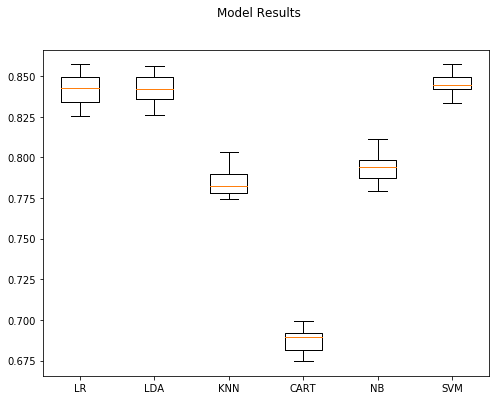

In [62]:
figure = plt.figure(figsize = (8,6))
figure.suptitle("Model Results")
axis = figure.add_subplot(111)
plt.boxplot(results.values())
axis.set_xticklabels(results.keys())
plt.show()

### Standard model comments

The first thing I noticed right away is how much faster training the set of models was.  Training wrapped up in about 9 mins compared to the sometimes hours required in previous write-ups.  Accuracy was also high being only two percentage points less then the baseline model:

|Model|Accuracy|Best Params                                      |
|-------------------|--------|-----------------------------------|
|LR (baseline)      |86.35%  |{'LR__C': 0.1, 'LR__penalty': 'l1'}|
|SVM centroid       |86.36%  |Scikit-learn defaults              |
|SVM Doc2Vec        |84.48%  |Scikit-learn defaults              |


Clearly for very large data sets the small drop in accuracy might be more than offset by the greatly reduced training time required.

# Tuning Doc2Vec

In [ ]:
#doc2vec parameters
vector_size = 300
window_size = 15
min_count = 1
sampling_threshold = 1e-5
negative_size = 5
train_epoch = 100 
dm = 0 #0 = dbow; 1 = dmpv
worker_count = 1 #number of parallel processes

In [91]:
doc2vecModel = Doc2Vec(
    vector_size = 300,
    window_size = 15,
    min_count = 4,
    sampling_threshold = 1e-5,
    negative_size = 5,
    train_epoch = 100 ,
    dm = 0, #0 = dbow; 1 = dmpv
    #worker_count = 1 #number of parallel processes
)

In [94]:
doc2vecModel = Doc2Vec(vector_size = 100, min_count = 5, epochs = 40)
doc2vecModel.build_vocab(taggedDocs)
doc2vecModel.train(taggedDocs, total_examples = doc2vecModel.corpus_count, epochs = doc2vecModel.epochs)

2018-11-05 16:25:08,957 : INFO : collecting all words and their counts
2018-11-05 16:25:08,957 : INFO : PROGRESS: at example #0, processed 0 words (0/s), 0 word types, 0 tags
2018-11-05 16:25:09,349 : INFO : PROGRESS: at example #10000, processed 2385574 words (6097466/s), 51527 word types, 10000 tags
2018-11-05 16:25:09,719 : INFO : PROGRESS: at example #20000, processed 4747503 words (6346052/s), 67813 word types, 20000 tags
2018-11-05 16:25:09,899 : INFO : collected 74218 word types and 25000 unique tags from a corpus of 25000 examples and 5920713 words
2018-11-05 16:25:09,899 : INFO : Loading a fresh vocabulary
2018-11-05 16:25:10,088 : INFO : effective_min_count=5 retains 28757 unique words (38% of original 74218, drops 45461)
2018-11-05 16:25:10,088 : INFO : effective_min_count=5 leaves 5845494 word corpus (98% of original 5920713, drops 75219)
2018-11-05 16:25:10,159 : INFO : deleting the raw counts dictionary of 74218 items
2018-11-05 16:25:10,169 : INFO : sample=0.001 downsamp

2018-11-05 16:25:45,897 : INFO : EPOCH - 8 : training on 5920713 raw words (4387846 effective words) took 4.4s, 990545 effective words/s
2018-11-05 16:25:46,914 : INFO : EPOCH 9 - PROGRESS: at 22.54% examples, 999266 words/s, in_qsize 5, out_qsize 0
2018-11-05 16:25:47,909 : INFO : EPOCH 9 - PROGRESS: at 45.31% examples, 998078 words/s, in_qsize 6, out_qsize 0
2018-11-05 16:25:48,917 : INFO : EPOCH 9 - PROGRESS: at 68.01% examples, 997035 words/s, in_qsize 6, out_qsize 0
2018-11-05 16:25:49,920 : INFO : EPOCH 9 - PROGRESS: at 91.53% examples, 1002397 words/s, in_qsize 5, out_qsize 0
2018-11-05 16:25:50,264 : INFO : worker thread finished; awaiting finish of 2 more threads
2018-11-05 16:25:50,264 : INFO : worker thread finished; awaiting finish of 1 more threads
2018-11-05 16:25:50,264 : INFO : worker thread finished; awaiting finish of 0 more threads
2018-11-05 16:25:50,274 : INFO : EPOCH - 9 : training on 5920713 raw words (4388447 effective words) took 4.4s, 1005406 effective words/s

2018-11-05 16:26:28,029 : INFO : EPOCH 18 - PROGRESS: at 68.96% examples, 1007053 words/s, in_qsize 5, out_qsize 0
2018-11-05 16:26:29,036 : INFO : EPOCH 18 - PROGRESS: at 92.06% examples, 1003520 words/s, in_qsize 5, out_qsize 0
2018-11-05 16:26:29,364 : INFO : worker thread finished; awaiting finish of 2 more threads
2018-11-05 16:26:29,364 : INFO : worker thread finished; awaiting finish of 1 more threads
2018-11-05 16:26:29,364 : INFO : worker thread finished; awaiting finish of 0 more threads
2018-11-05 16:26:29,364 : INFO : EPOCH - 18 : training on 5920713 raw words (4386755 effective words) took 4.3s, 1009325 effective words/s
2018-11-05 16:26:30,374 : INFO : EPOCH 19 - PROGRESS: at 22.54% examples, 994728 words/s, in_qsize 5, out_qsize 0
2018-11-05 16:26:31,385 : INFO : EPOCH 19 - PROGRESS: at 46.50% examples, 1020241 words/s, in_qsize 5, out_qsize 0
2018-11-05 16:26:32,384 : INFO : EPOCH 19 - PROGRESS: at 69.73% examples, 1021483 words/s, in_qsize 6, out_qsize 0
2018-11-05 16:

2018-11-05 16:27:11,702 : INFO : worker thread finished; awaiting finish of 2 more threads
2018-11-05 16:27:11,705 : INFO : worker thread finished; awaiting finish of 1 more threads
2018-11-05 16:27:11,707 : INFO : worker thread finished; awaiting finish of 0 more threads
2018-11-05 16:27:11,707 : INFO : EPOCH - 27 : training on 5920713 raw words (4388450 effective words) took 4.5s, 975936 effective words/s
2018-11-05 16:27:12,725 : INFO : EPOCH 28 - PROGRESS: at 21.95% examples, 969438 words/s, in_qsize 6, out_qsize 0
2018-11-05 16:27:13,741 : INFO : EPOCH 28 - PROGRESS: at 42.62% examples, 929598 words/s, in_qsize 5, out_qsize 0
2018-11-05 16:27:14,748 : INFO : EPOCH 28 - PROGRESS: at 65.84% examples, 956873 words/s, in_qsize 5, out_qsize 0
2018-11-05 16:27:15,749 : INFO : EPOCH 28 - PROGRESS: at 88.18% examples, 963058 words/s, in_qsize 5, out_qsize 0
2018-11-05 16:27:16,244 : INFO : worker thread finished; awaiting finish of 2 more threads
2018-11-05 16:27:16,252 : INFO : worker th

2018-11-05 16:27:53,834 : INFO : EPOCH 37 - PROGRESS: at 22.33% examples, 993358 words/s, in_qsize 5, out_qsize 0
2018-11-05 16:27:54,844 : INFO : EPOCH 37 - PROGRESS: at 44.68% examples, 980057 words/s, in_qsize 5, out_qsize 0
2018-11-05 16:27:55,846 : INFO : EPOCH 37 - PROGRESS: at 67.68% examples, 990074 words/s, in_qsize 5, out_qsize 0
2018-11-05 16:27:56,850 : INFO : EPOCH 37 - PROGRESS: at 90.16% examples, 987406 words/s, in_qsize 6, out_qsize 0
2018-11-05 16:27:57,250 : INFO : worker thread finished; awaiting finish of 2 more threads
2018-11-05 16:27:57,257 : INFO : worker thread finished; awaiting finish of 1 more threads
2018-11-05 16:27:57,261 : INFO : worker thread finished; awaiting finish of 0 more threads
2018-11-05 16:27:57,261 : INFO : EPOCH - 37 : training on 5920713 raw words (4388840 effective words) took 4.4s, 990454 effective words/s
2018-11-05 16:27:58,276 : INFO : EPOCH 38 - PROGRESS: at 22.50% examples, 993752 words/s, in_qsize 6, out_qsize 0
2018-11-05 16:27:59

In [95]:
# Init vars
folds = 10
seed = 10
models = []
results = {}

# Use accuracy since this is a classification
score = 'accuracy'

# Assign training features and labels
xTrain = doc2vecModel.docvecs
yTrain = df.iloc[:, 1]

# Instantiate model objects
models.append(('LR', LogisticRegression()))
#models.append(('LDA', LinearDiscriminantAnalysis()))
#models.append(('KNN', KNeighborsClassifier()))
#models.append(('CART', DecisionTreeClassifier()))
#models.append(('NB', GaussianNB()))
#models.append(('SVM', SVC()))

# Create a Pandas DF to hold all our spiffy results
_df = pd.DataFrame(columns = ['Model', 'Accuracy', 'StdDev'])

# Run the models
for modelName, model in models:
    print("Training", modelName, "....")
    # Implement K-fold cross validation where K = 10
    kFold = KFold(n_splits = folds, random_state = seed)
    results[modelName] = cross_val_score(model, xTrain, yTrain, cv = kFold, scoring = score)
    _df.loc[len(_df)] = list([modelName, results[modelName].mean(), results[modelName].std()])

# Print results sorted by Mean desc, StdDev asc, Model asc
_df.sort_values(by = ['Accuracy', 'StdDev', 'Model'], ascending = [False, True, True])

Training LR ....


,Model,Accuracy,StdDev
0,LR,0.85208,0.009182


# Combing models

https://markroxor.github.io/gensim/static/notebooks/doc2vec-IMDB.html

In [87]:
simple_models = [
    # PV-DM w/concatenation - window=5 (both sides) approximates paper's 10-word total window size
    Doc2Vec(dm=1, dm_concat=1, size=100, window=5, negative=5, hs=0, min_count=2, workers=cores),
    # PV-DBOW 
    Doc2Vec(dm=0, size=100, negative=5, hs=0, min_count=2, workers=cores),
    # PV-DM w/average
    Doc2Vec(dm=1, dm_mean=1, size=100, window=10, negative=5, hs=0, min_count=2, workers=cores),
]

NameError: name 'cores' is not defined

# Summary

In [76]:
%%html
<style>
table {float:left}
</style>

In this write-up we accomplished the following:

1. Created a set of word embeddings from the IMDb movie review text utilizing Word2vec
2. Clustered the embeddings utilizing a K-nearest neighbors algorithm into a set of centroids
3. Trained and evaluated the models from the last write-up against the centroid feature set

And finally, here is the baseline model's performance vs. the 'centroid' model we developed in this write-up:

|Model|Accuracy|Best Params                           |
|-------------------|--------|-----------------------------------|
|LR (baseline)      |86.35%  |{'LR__C': 0.1, 'LR__penalty': 'l1'}|
|Kaggle centroid    |84.68%  |Estimators = 100                   |
|SVM centroid       |86.36%  |Scikit-learn defaults              |

<div style="clear: both;"></div>

Similar to the last [last write-up](./Model-06.p2.ipynb) the work in this notebook was an interesting idea to explore, but ultimately didn't result in an overall performance increase versus the baseline model.  As such this line of exploration will be rejected in favor of keeping the current base line model and accuracy rating as benchmarks moving forward.